# Notebook Description:
- This notebook shows the prediction results when submitting the Independent Dataset X_test data to various external prediction servers.

# Imports:

In [138]:
import pandas as pd
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

%matplotlib inline

In [76]:
# Importing y_test data:
y_test_indep = pd.read_csv('Datasets/INDEP_DATA/y_test.csv', header=None, names=['AMP'])

In [77]:
y_test_indep.head(3)

,AMP
0,0
1,0
2,0


# Functions for Processing Predictions:

In [ ]:
# Function used to import and rename columns from the external prediction text files:
dict_pred = {'NAMP': 0, 'AMP':1}

def import_and_rename(file, method):
    df = pd.read_csv(file, sep='\s+', header=None)
    
    if method == 'ANN':
        df = df.rename(columns={0: "id_ref", 1: "AMP_Pred"})
    else:
        df = df.rename(columns={0: "id_ref", 1: "AMP_Pred", 2: "Probability"})
    
    # Mapping dictionary of boolean value to Prediction column:
    df['AMP_Pred'] = df['AMP_Pred'].map(dict_pred)
    
    return df

In [125]:
def display_conf_matrix(true_labels, pred_labels, classifier):
    
    fig = plt.figure(figsize=(6,4), dpi=100)

    confusion_matrix1 = pd.crosstab(np.array(true_labels), 
                                   np.array(pred_labels),
                                   rownames=['Actual'], colnames=['Predicted'])
    confusion_matrix2 = pd.crosstab(np.array(true_labels), 
                                   np.array(pred_labels),
                                   rownames=['Actual'], colnames=['Predicted'], normalize='index')


    # Extracting counts and percentages from the matrices above:
    counts = ["{0:,}".format(value) for value in
                    confusion_matrix1.to_numpy().flatten()]

    percentages = ["{0:.2%}".format(value) for value in
                         confusion_matrix2.to_numpy().flatten()]

    # Combining counts and percentages as one label:
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(percentages, counts)]

    # Reshaping the labels to fit the array:
    labels = np.asarray(labels).reshape(2,2)

    #Plotting the heatmap:
    sns.heatmap(confusion_matrix2, annot=labels, fmt='', cmap='BuPu')
    plt.title("Confusion Matrix - %s\n" % classifier, fontweight='bold')
    #plt.savefig('Figures/MLP_Conf_Mat.png', bbox_inches='tight')
    plt.show()

In [168]:
def print_metrics(true_labels, pred_labels):
    CM = confusion_matrix(true_labels, pred_labels, labels=[0, 1])

    TP = CM[1][1]
    FN = CM[1][0]
    FP = CM[0][1]
    TN = CM[0][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print(f"Sensitivity:     {TPR*100:.2f}%")
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print(f"Specificity:     {TNR*100:.2f}%")
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print(f"Accuracy:        {ACC*100:.2f}%") 

    # f1 Score:
    F1 = TP/(TP + (0.5*(FP+FN)))
    print(f"F1 Score:        {F1*100:.2f}%") 

    MCC = ((TP*TN)-(FP*FN))/ (((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**0.5)
    print(f"MCC:             {MCC*100:.2f}%") 
    
    auROC = roc_auc_score(true_labels, pred_labels, average=None)
    print(f"auROC:           {auROC*100:.2f}%") 
    
    metrics = [TPR*100, TNR*100, ACC*100, F1*100, MCC*100, auROC*100]
    
    return metrics

# CAMP R3:
CAMPR3 (Collection of Anti-Microbial Peptides) - http://www.camp.bicnirrh.res.in/index.php - provides 4 trained models to predict Antimicrobial peptides. The results after submitting our independent X_test data are shown below:

## CAMP SVM Classifier:

In [66]:
camp_svm = import_and_rename('Predictions/INDEP/CAMP/CAMP_SVM.txt', 'SVM')

In [67]:
camp_svm.head()

,id_ref,AMP_Pred,Probability
0,1,1,0.502
1,2,0,0.048
2,3,0,0.171
3,4,1,0.708
4,5,1,0.858


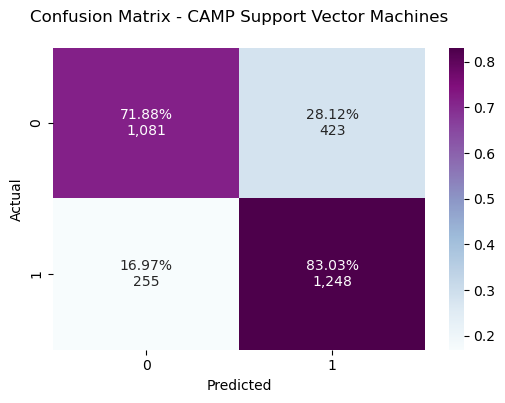

In [86]:
display_conf_matrix(y_test_indep.AMP, camp_svm.AMP_Pred, 'CAMP Support Vector Machines')

In [170]:
camp_svm_metrics = print_metrics(y_test_indep.AMP, camp_svm.AMP_Pred)

Sensitivity:     83.03%
Specificity:     71.88%
Accuracy:        77.45%
F1 Score:        78.64%
MCC:             55.25%
auROC:           77.45%


## CAMP RF Classifier:

In [68]:
camp_rf = import_and_rename('Predictions/INDEP/CAMP/CAMP_RF.txt', 'RF')

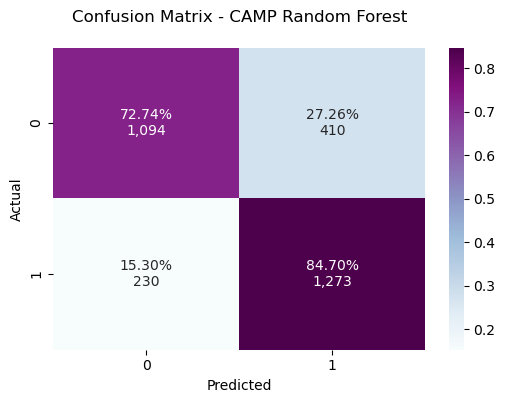

In [85]:
display_conf_matrix(y_test_indep.AMP, camp_rf.AMP_Pred, 'CAMP Random Forest')

In [171]:
camp_rf_metrics = print_metrics(y_test_indep.AMP, camp_rf.AMP_Pred)

Sensitivity:     84.70%
Specificity:     72.74%
Accuracy:        78.72%
F1 Score:        79.91%
MCC:             57.85%
auROC:           78.72%


## CAMP DA Classifier:

In [70]:
camp_da = import_and_rename('Predictions/INDEP/CAMP/CAMP_DA.txt', 'DA')

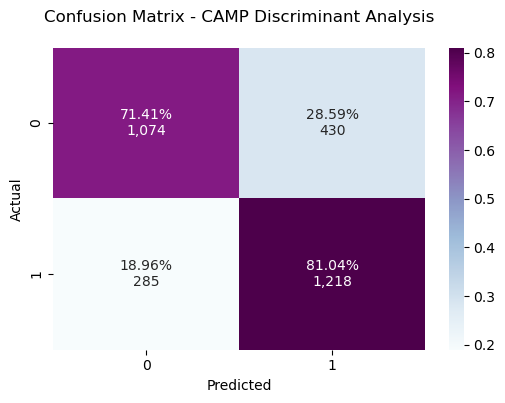

In [88]:
display_conf_matrix(y_test_indep.AMP, camp_da.AMP_Pred, 'CAMP Discriminant Analysis')

In [172]:
camp_da_metrics = print_metrics(y_test_indep.AMP, camp_da.AMP_Pred)

Sensitivity:     81.04%
Specificity:     71.41%
Accuracy:        76.22%
F1 Score:        77.31%
MCC:             52.69%
auROC:           76.22%


## CAMP ANN Classifier:

In [71]:
camp_ann = import_and_rename('Predictions/INDEP/CAMP/CAMP_ANN.txt', 'ANN')

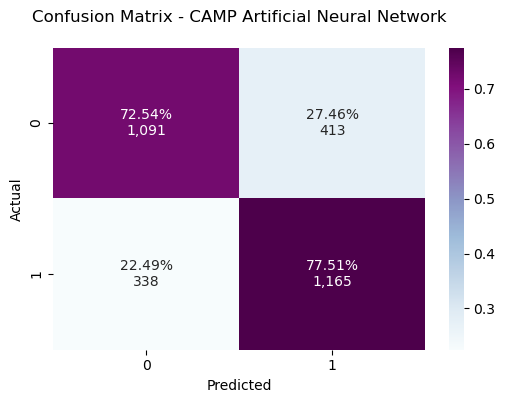

In [91]:
display_conf_matrix(y_test_indep.AMP, camp_ann.AMP_Pred, 'CAMP Artificial Neural Network')

In [173]:
camp_ann_metrics = print_metrics(y_test_indep.AMP, camp_ann.AMP_Pred)

Sensitivity:     77.51%
Specificity:     72.54%
Accuracy:        75.02%
F1 Score:        75.62%
MCC:             50.11%
auROC:           75.03%


# iAMP-2L:
- Prediction server: http://www.jci-bioinfo.cn/bioinfo/iAMP-2L
- Paper: https://www.sciencedirect.com/science/article/pii/S0003269713000390

In [109]:
iamp_2L = pd.read_csv('Predictions/INDEP/iAMP_2L.txt', sep='/n', header=None, engine='python', names=['AMP_Pred'])
# Splitting predictions from text data:
iamp_2L = iamp_2L["AMP_Pred"].str.split(" ", expand = True)[[3, 7]].rename(columns={3: "id_ref", 7: "AMP_Pred"})
dict_pred_iamp = {'non-AMP.': 0, 'AMP':1}
iamp_2L['AMP_Pred'] = iamp_2L['AMP_Pred'].map(dict_pred_iamp)

In [110]:
iamp_2L.head()

,id_ref,AMP_Pred
0,(P80168),0
1,(P17228),0
2,(P0C2A3),1
3,(P34451),0
4,(DRAMP00493),0


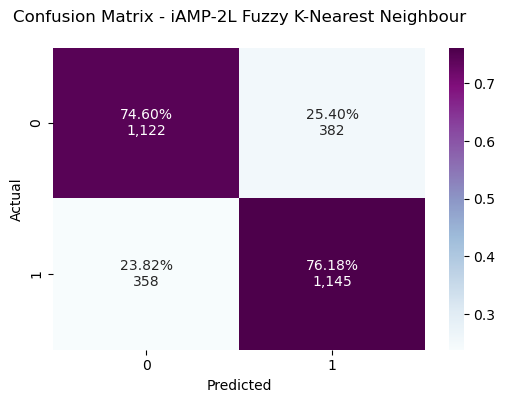

In [112]:
display_conf_matrix(y_test_indep.AMP, iamp_2L.AMP_Pred, 'iAMP-2L Fuzzy K-Nearest Neighbour')

In [174]:
iamp_2L_metrics = print_metrics(y_test_indep.AMP, iamp_2L.AMP_Pred)

Sensitivity:     76.18%
Specificity:     74.60%
Accuracy:        75.39%
F1 Score:        75.58%
MCC:             50.79%
auROC:           75.39%


# iAMPpred:
- Prediction server: http://cabgrid.res.in:8080/amppred/
- Paper: https://www.nature.com/articles/srep42362

In [119]:
iampPred = pd.read_csv('Predictions/INDEP/iampPred.csv')

In [120]:
iampPred.head()

,name_fasta,antibacterial,antiviral,antifungal,AMP
0,P80168,0.646,0.379,0.243,1
1,P17228,0.232,0.460,0.315,0
2,P0C2A3,0.097,0.080,0.109,0
3,P34451,0.358,0.286,0.564,1
4,DRAMP00493,0.939,0.695,0.967,1


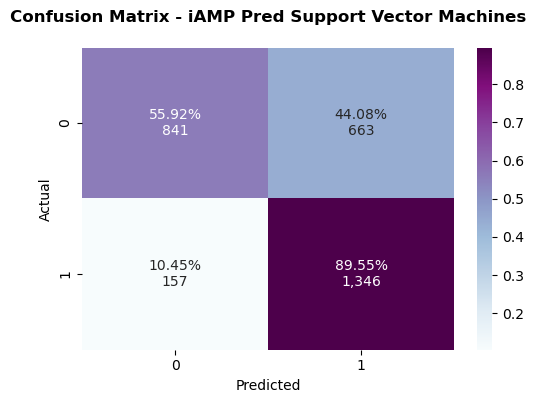

In [126]:
display_conf_matrix(y_test_indep.AMP, iampPred.AMP, 'iAMP Pred Support Vector Machines')

In [175]:
iampPred_metrics = print_metrics(y_test_indep.AMP, iampPred.AMP)

Sensitivity:     89.55%
Specificity:     55.92%
Accuracy:        72.73%
F1 Score:        76.65%
MCC:             48.28%
auROC:           72.74%


# Veltri Predictions:
- Prediction server: https://academic.oup.com/bioinformatics/article/34/16/2740/4953367
- Paper: https://academic.oup.com/bioinformatics/article/34/16/2740/4953367

In [130]:
veltriPred = pd.read_csv('Predictions/INDEP/veltri.csv')
dict_pred_velt = {'Non-AMP': 0, 'AMP':1}
veltriPred['Prediction_Class'] = veltriPred['Prediction_Class'].map(dict_pred_velt)

In [131]:
veltriPred.head()

,SeqID,Prediction_Class,Prediction_Probability,Sequence
0,P80168,1,0.9045,MAYVINDSCISCGACEPECPVNAITAGDDKYVIDAATCIDCGACAG...
1,P17228,0,0.1264,MNFPSIFVPLVGLVFPAIAMASLFLYVQKNKIV
2,P0C2A3,0,0.0051,ADVPGNYPLNSYGASYYCTI
3,P34451,0,0.1318,MKHKRMMLPHYVRVYVCVRTDGENEKAGQSEEYDDDDKEENKKRRR...
4,DRAMP00493,1,1.0000,TTAGRRDGKSGRTEWLYVAGECAKLPRCNKYCVSNGFHLGGFCEKL...


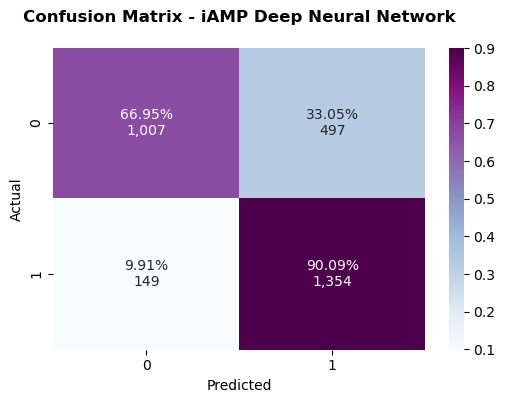

In [132]:
display_conf_matrix(y_test_indep.AMP, veltriPred.Prediction_Class, 'iAMP Deep Neural Network')

In [183]:
veltri_metrics = print_metrics(y_test_indep.AMP, veltriPred.Prediction_Class)

Sensitivity:     90.09%
Specificity:     66.95%
Accuracy:        78.52%
F1 Score:        80.74%
MCC:             58.63%
auROC:           78.52%


# AmPep Predictions:
- Prediction Server: https://app.cbbio.online/ampep/home
- Paper: https://www.nature.com/articles/s41598-018-19752-w

In [134]:
amPEP = pd.read_csv('Predictions/INDEP/ampep.csv')

In [135]:
amPEP.head()

,id,ampep,number_of_positives,sequence
0,P80168,1,1,MAYVINDSCISCGACEPECPVNAITAGDDKYVIDAATCIDCGACAG...
1,P17228,0,0,MNFPSIFVPLVGLVFPAIAMASLFLYVQKNKIV
2,P0C2A3,0,0,ADVPGNYPLNSYGASYYCTI
3,P34451,1,1,MKHKRMMLPHYVRVYVCVRTDGENEKAGQSEEYDDDDKEENKKRRR...
4,DRAMP00493,1,1,TTAGRRDGKSGRTEWLYVAGECAKLPRCNKYCVSNGFHLGGFCEKL...


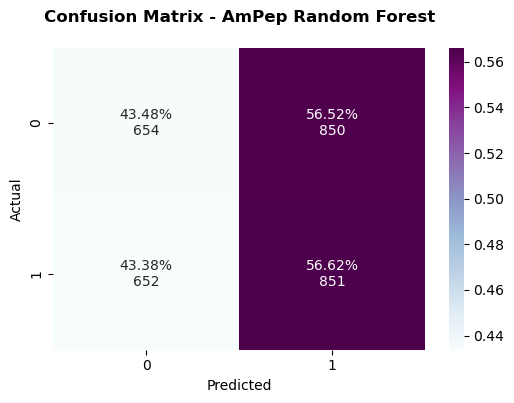

In [136]:
display_conf_matrix(y_test_indep.AMP, amPEP.ampep, 'AmPep Random Forest')

In [184]:
amPep_metrics = print_metrics(y_test_indep.AMP, amPEP.ampep)

Sensitivity:     56.62%
Specificity:     43.48%
Accuracy:        50.05%
F1 Score:        53.12%
MCC:             0.11%
auROC:           50.05%


# Create Dataframe of Metrics:

In [189]:
metrics_df = pd.DataFrame({'amPEP':amPep_metrics, 'CAMP-ANN':camp_ann_metrics, 'CAMP-DA':camp_da_metrics, 
                           'CAMP-RF':camp_rf_metrics, 'CAMP-SVM':camp_svm_metrics, 'iAMP-2L':iamp_2L_metrics, 
                           'iAMPpred':iampPred_metrics, 'Veltri-DNN':veltri_metrics}).T.rename(
                        columns={0: "Sensitivity (%)", 1: "Specificity (%)", 2: "Accuracy (%)", 
                                 3: "F1 Score (%)", 4: "MCC (%)", 5: "auROC (%)"})
metrics_df

,Sensitivity (%),Specificity (%),Accuracy (%),F1 Score (%),MCC (%),auROC (%)
amPEP,56.620093,43.484043,50.049884,53.121099,0.105046,50.052068
CAMP-ANN,77.511643,72.539894,75.024942,75.624797,50.113094,75.025768
CAMP-DA,81.037924,71.409574,76.222148,77.308791,52.691414,76.223749
CAMP-RF,84.697272,72.739362,78.716329,79.912116,57.850396,78.718317
CAMP-SVM,83.033932,71.875000,77.452611,78.638941,55.252884,77.454466
iAMP-2L,76.180971,74.601064,75.390755,75.577558,50.788237,75.391018
iAMPpred,89.554225,55.917553,72.730296,76.651481,48.282540,72.735889
Veltri-DNN,90.086494,66.954787,78.516794,80.739416,58.628739,78.520640


In [190]:
metrics_df.to_csv('Results/External_Pred_Metrics.csv')